
Classification:- using the platform's computational environment  to build and


run machine learning models that assign data points to predefined categories or class



In [5]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Project:Heart Disease Risk Prediction (Information)

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

Step 1: Load The dataset..

In [10]:
df=pd.read_csv("/content/drive/MyDrive/heart (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 2: Checking info of the Dataset

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Step 3: Checking Dataset contain null Value or not..

In [15]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Step 4:Checking The count..

In [16]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categories=['target']
for i in categories:
  df[i]=le.fit_transform(df[i])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Step 5: Graphical Represention..

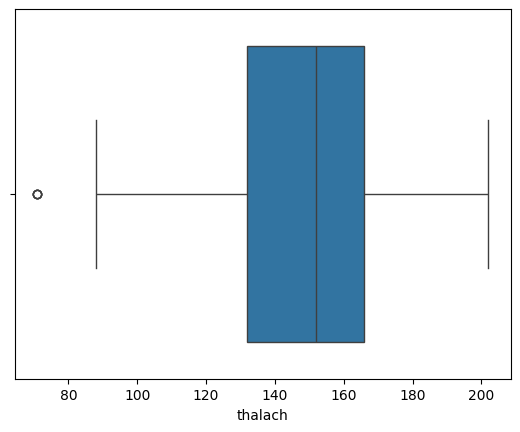

In [18]:
sns.boxplot(x=df["thalach"])
plt.show()

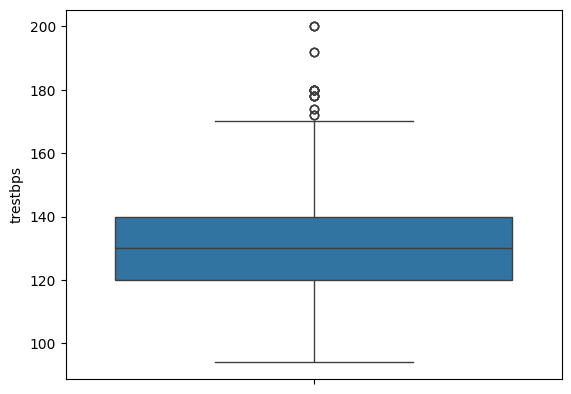

In [19]:
sns.boxplot(y="trestbps",data=df)
plt.show()

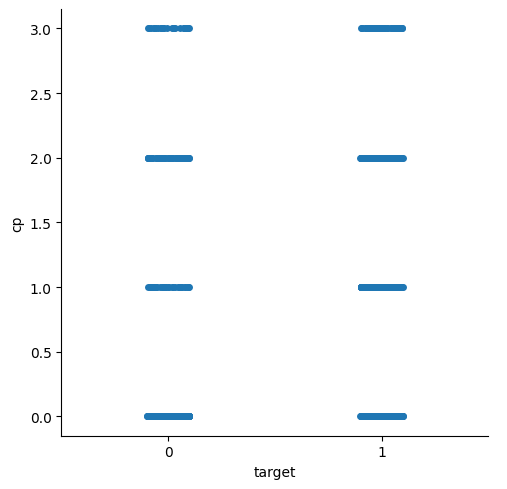

In [20]:
sns.catplot(x='target',y='cp',data=df)
plt.show()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

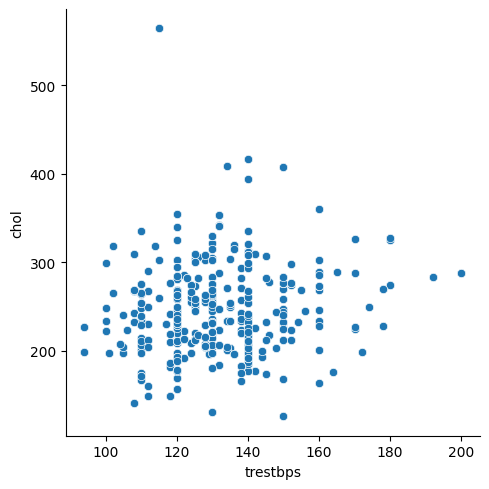

In [22]:
sns.relplot(x='trestbps',y='chol',data=df)
plt.show()

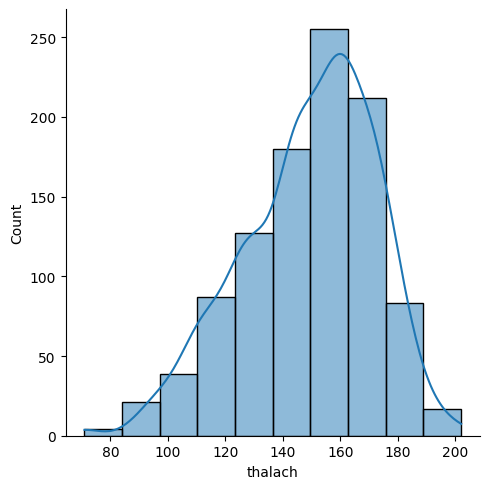

In [23]:
sns.displot(df['thalach'],bins=10,kde=True)
plt.show()

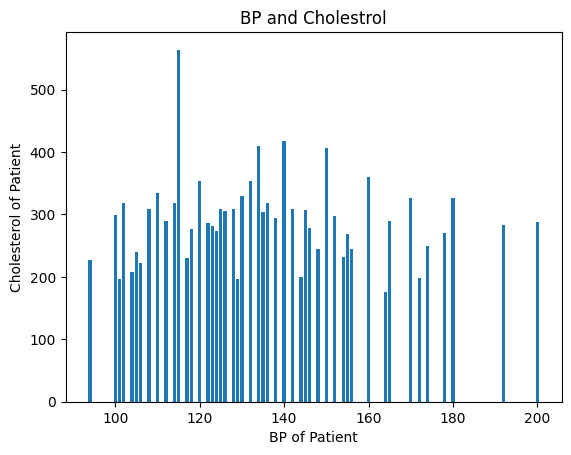

In [24]:
plt.bar(df['trestbps'],df['chol'])
plt.xlabel('BP of Patient')
plt.ylabel('Cholesterol of Patient')
plt.title('BP and Cholestrol')
plt.show()

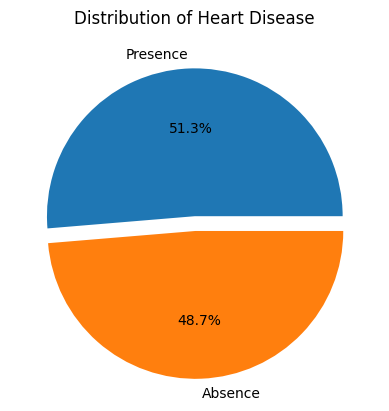

In [25]:
heart_disease_counts = df['target'].value_counts()
labels = ['Absence' if x == 0 else 'Presence' for x in heart_disease_counts.index]
plt.pie(heart_disease_counts, labels=labels, autopct='%1.1f%%', explode=[0,0.1])
plt.title('Distribution of Heart Disease')
plt.show()

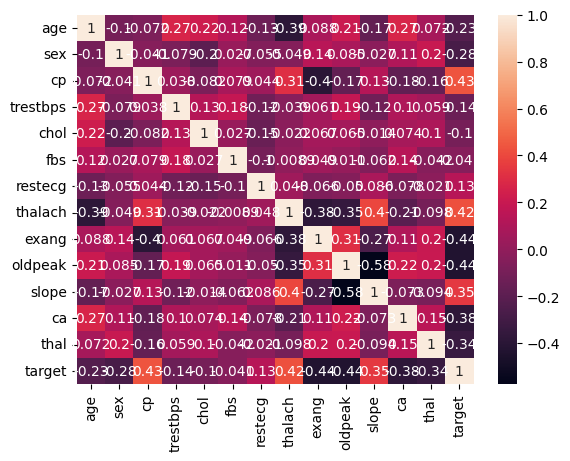

In [26]:
c_m = df.corr(numeric_only=True)
sns.heatmap(c_m,annot=True)
plt.show()

Step 6: Data Wrongling...

> 1) Assign X & y values.
  2) Data Balancing..
  3) Train and Test..



In [27]:
from sklearn.model_selection import train_test_split
x=df.drop("target",axis=1)
y=df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler(random_state=0)
x_new,y_new=rs.fit_resample(x,y)

print('after undersampling dataset shape')
print("--------------------------------")

y_new.value_counts()

after undersampling dataset shape
--------------------------------


,count
target,
0,499
1,499


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier(random_state=0)
dt_default.fit(x_train,y_train)

pred_train=dt_default.predict(x_train)
pred_test=dt_default.predict(x_test)


from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,pred_train))
print("Test Accuracy :",accuracy_score(y_test,pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 1.0
Test Accuracy : 0.9707792207792207
Cross Validation Score: 0.9970731707317073


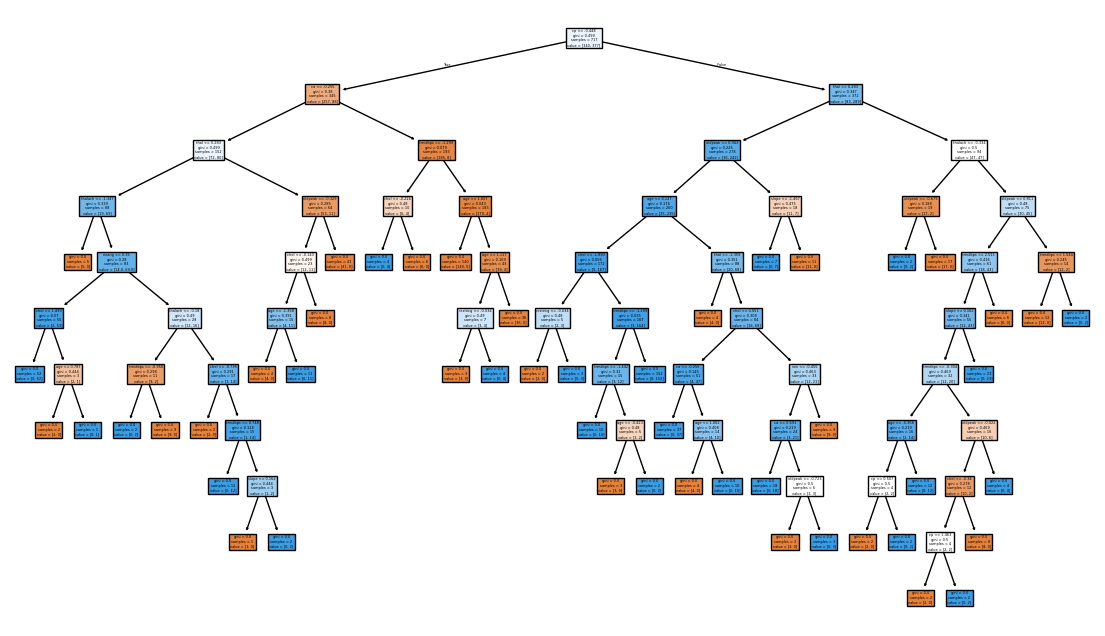

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8),dpi=100)
plot_tree(dt_default,filled=True,feature_names=x.columns)
plt.show()

In [32]:
pd.DataFrame(index=x.columns,data=dt_default.feature_importances_,columns=["Feature Importance"])

,Feature Importance
age,0.072116
sex,0.028032
cp,0.283812
trestbps,0.067270
chol,0.061579
fbs,0.000000
restecg,0.016302
thalach,0.054370
exang,0.015965
oldpeak,0.093999


Step 7: Data Modeling..

In [33]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=0)
param_grid={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4]
}

cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
dt_default.fit(x_train,y_train)

pred_train=dt_default.predict(x_train)
pred_test=dt_default.predict(x_test)


from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,pred_train))
print("Test Accuracy :",accuracy_score(y_test,pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 0.8661087866108786
Test Accuracy : 0.8116883116883117
Cross Validation Score: 0.831219512195122


In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)


from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 1.0
Test Accuracy : 0.9805194805194806
Cross Validation Score: 0.831219512195122


In [36]:
from sklearn.model_selection import GridSearchCV

estimator=RandomForestClassifier(random_state=0)
param_grid={'n_estimators':list(range(1,101))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 8}

In [37]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=8,random_state=0)
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)


from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 0.99860529986053
Test Accuracy : 0.9642857142857143
Cross Validation Score: 0.831219512195122


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

estimator=SVC()
param_grid={'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}

grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [39]:
from sklearn.svm import SVC
model=SVC(C=0.1, kernel='linear')
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

0.8605299860529986
0.8051948051948052
Cross Validation Score: 0.831219512195122


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

y_pred_train=knn_model.predict(x_train)
y_pred_test=knn_model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x_train,y_train,cv=5)
scores.mean()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

0.9246861924686193
0.8409090909090909
Cross Validation Score: 0.831219512195122


In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x_train,y_train,cv=5)
scores.mean()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())


0.8688981868898187
0.8051948051948052
Cross Validation Score: 0.831219512195122


In [44]:
Heart_df=pd.DataFrame({
    "Algorithm":["KNN","SVC","DT","RF","LR"],
    "Train Accuracy":[0.88,0.85,0.79,1,0.85],
    "Test Accuracy":[0.79,0.83,0.71,0.83,0.82],
    "CV Score":[0.80,0.80,0.74,0.80,0.80]
})
Heart_df

,Algorithm,Train Accuracy,Test Accuracy,CV Score
0,KNN,0.88,0.79,0.80
1,SVC,0.85,0.83,0.80
2,DT,0.79,0.71,0.74
3,RF,1.00,0.83,0.80
4,LR,0.85,0.82,0.80


In [45]:
from joblib import dump

In [55]:
dump(model,'Heart_model.joblib')

['Heart_model.joblib']